## **TODO**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math

from sklearn.model_selection import train_test_split
"""
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest
from tabulate import tabulate

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, Matern, WhiteKernel, RationalQuadratic, ExpSineSquared, Exponentiation, DotProduct
"""
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/home/gepeto/Desktop/UNI/aprenentatge computacional/practiques/kaggle/git-rep/data/Android_Permission.csv", header=0, delimiter=',')

### **1. EDA i Preprocessing**

In [3]:
print(df.shape)

(29999, 184)


In [4]:
df.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df.describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
count,29999.000000,2.999900e+04,29999.000000,29795.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,...,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,3.537215,6.852608e+03,0.625707,3.111160,1.353978,0.000300,0.000700,0.0,0.000400,0.000033,...,0.014667,0.087970,0.023801,0.001333,0.000567,0.000400,0.016567,0.039735,0.001500,0.666689
std,1.424685,4.586899e+04,3.222620,3.052602,1.523491,0.017318,0.026449,0.0,0.019997,0.005774,...,0.120219,0.283255,0.152431,0.036492,0.023799,0.019997,0.127645,0.195338,0.038702,0.471405
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,4.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.600000e+01,0.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.400000,7.160000e+02,0.000000,4.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,1.908590e+06,158.070000,30.000000,16.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Comencem veient algunes estadísitques sobre el que serà l'atribut objectiu, "Class", sent una aplicació benigna si class = 0 i malware si class = 1.

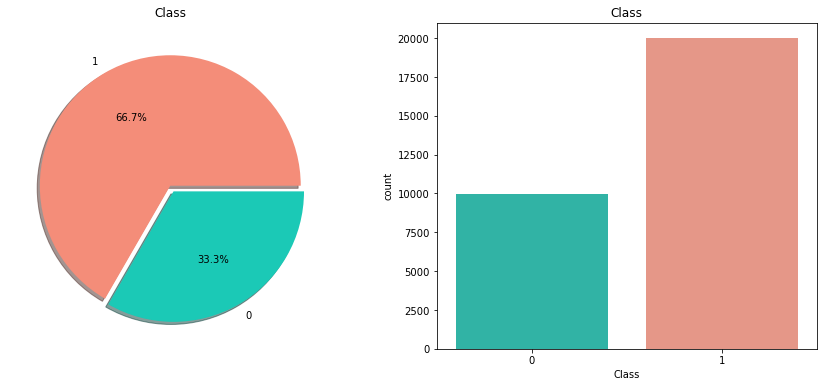

In [6]:
# Class stats: benign(0) or malware(1)

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1 = df['Class'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax1,shadow=True, colors=['#f48d79',"#1bc9b6"])
ax1.set_title('Class')
ax1.set_ylabel('')

ax2 = sns.countplot('Class',data=df,ax=ax2,palette=['#1bc9b6',"#f48d79"])
ax2.set_title('Class')
plt.show()

Només 1/3 de les aplicacions són benignes, aproximadament 10000.

Hi ha moltes columnes a partir del 'Safe count permission' no inclos, les quals probablement podriem eliminar ja que la majoria de valors són 0 o 1 i no són realment útils. Per tant sí menys de 1000 tenen un "0" o més de 28999 són "0", eliminarem la respectiva columna.

In [7]:
dropper = []
for col in df.columns[10:]:
    if (df[col].value_counts()[0] > 28999 or df[col].value_counts()[0] < 1000):
        dropper.append(col)

df = df.drop(df[dropper], axis = 1)

També elimino la columna 'Related apps' ja que no crec que sigui útil pel nostre classificador.

In [8]:
df = df.drop(['Related apps'], axis = 1)

Anem a veure si hi ha valors no existents. Com que hi ha molt pocs valors no existents eliminem tots aquests que no hi existeixen.

In [9]:
print(df.isnull().sum(),'\n')
df = df.dropna()

App                                                                                  1
Package                                                                              0
Category                                                                             0
Description                                                                          3
Rating                                                                               0
Number of ratings                                                                    0
Price                                                                                0
Dangerous permissions count                                                        204
Safe permissions count                                                               0
Hardware controls : control vibrator (S)                                             0
Hardware controls : record audio (D)                                                 0
Hardware controls : take pictures and video

Excepte l'atribut 'Category', els altres que són de tipus text, pel que per transformar-los en tipus numèric busquem patrons comuns que tenen les aplicacions malignes. Per 'Category' farem una codificació amb el Label Encoder de la llibreria sklearn.

In [10]:
# encoding Category
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# patrons columnes tipues text
# nombre de majúscules entre les tres columnes
df['App_Upper'] = df['App'].apply(lambda message: sum(1 for c in str(message) if c.isupper()))
df['Pack_Upper'] = df['Package'].apply(lambda message: sum(1 for c in str(message) if c.isupper()))
df['Description_Upper'] = df['Description'].apply(lambda message: sum(1 for c in str(message) if c.isupper()))

# nombre de punts a 'Package'
df['Pack_Periods'] = df['Package'].apply(lambda message: sum(1 for c in str(message) if '.' in c))

# paraules com "free" o "better" en el nom
df['App_Free_Better'] = df['App'].str.contains('free|better').astype(int)


df = df.drop(['App'], axis = 1)
df = df.drop(['Package'], axis = 1)
df = df.drop(['Description'], axis = 1)

Miro si hi han correlacions entre atributs.

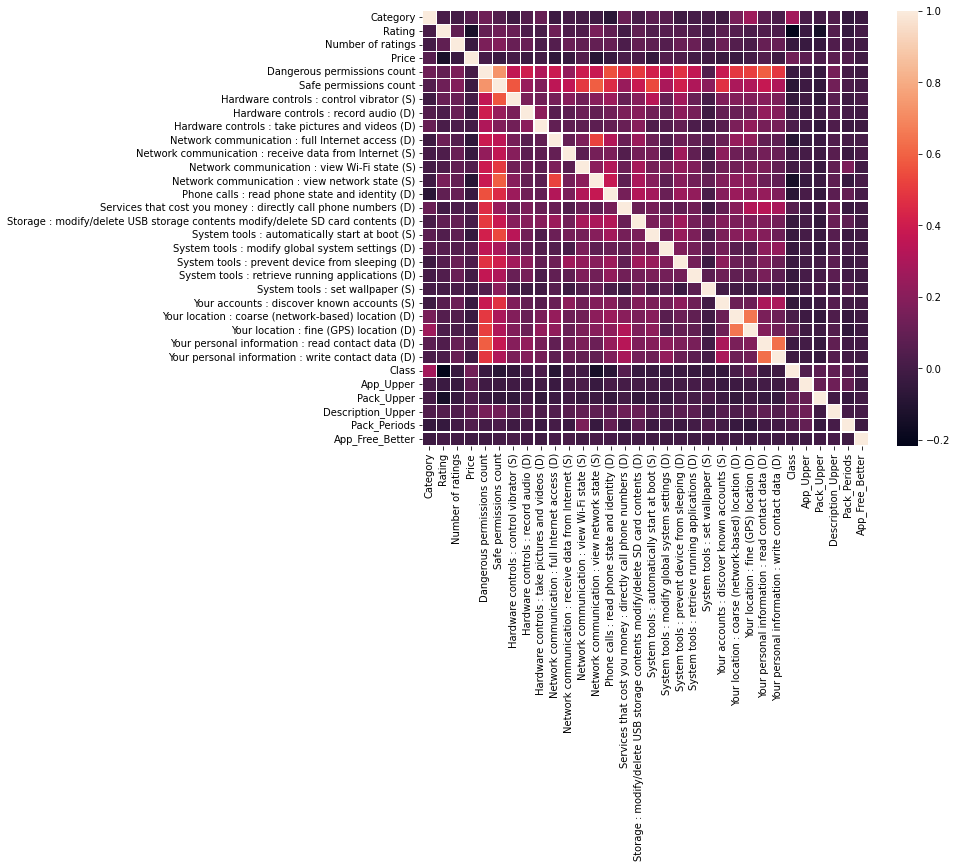

In [11]:
correlacio = df.corr()
plt.figure(figsize = (10,8))
ax = sns.heatmap(correlacio, linewidths=.2)

Sembla que l'atribut 'Class' no té alta correlació amb ningún altre atribut, de fet, només 'Dangerous permissions count' i 'Safe permissions count' semblen estar correlacionats.

Separo el model en entrenament i test.

**Probar amb standard i sense**

### **Pycaret**

In [12]:
from pycaret.classification import *

Provo primer amb les dades normalitzades.

In [13]:
clf = setup(data = df, target = 'Class', train_size = 0.7, normalize=True, silent=True, session_id = 101)

,Description,Value
0,session_id,101
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(29791, 32)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,23
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
top3_st = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8166,0.9010,0.8396,0.8785,0.8586,0.5979,0.5992,0.1460
gbc,Gradient Boosting Classifier,0.8080,0.8904,0.8408,0.8660,0.8532,0.5762,0.5768,1.0640
rf,Random Forest Classifier,0.8042,0.8662,0.8525,0.8523,0.8524,0.5614,0.5615,0.7840
ada,Ada Boost Classifier,0.7917,0.8731,0.8345,0.8490,0.8417,0.5373,0.5376,0.3070
et,Extra Trees Classifier,0.7820,0.8030,0.8440,0.8302,0.8370,0.5079,0.5082,1.0110
dt,Decision Tree Classifier,0.7715,0.7435,0.8316,0.8254,0.8285,0.4866,0.4867,0.0630
knn,K Neighbors Classifier,0.7299,0.7916,0.7872,0.8021,0.7945,0.4004,0.4007,2.3550
svm,SVM - Linear Kernel,0.7185,0.0000,0.7636,0.8051,0.7822,0.3827,0.3867,0.1270
lr,Logistic Regression,0.7180,0.7995,0.8084,0.7759,0.7918,0.3554,0.3562,1.0250
lda,Linear Discriminant Analysis,0.6968,0.7550,0.8430,0.7375,0.7867,0.2705,0.2780,0.1670


I ara amb les originals:

In [15]:
clf = setup(data = df, target = 'Class', train_size = 0.7, silent=True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(29791, 32)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,23
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
top3 = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8196,0.9024,0.8461,0.8788,0.8621,0.6017,0.6027,0.1300
gbc,Gradient Boosting Classifier,0.8066,0.8918,0.8407,0.8654,0.8528,0.5712,0.5718,1.1250
rf,Random Forest Classifier,0.8031,0.8646,0.8528,0.8520,0.8524,0.5570,0.5571,0.7890
ada,Ada Boost Classifier,0.7921,0.8742,0.8390,0.8476,0.8432,0.5347,0.5349,0.3070
et,Extra Trees Classifier,0.7792,0.7984,0.8435,0.8284,0.8358,0.4987,0.4990,1.0210
dt,Decision Tree Classifier,0.7738,0.7469,0.8295,0.8308,0.8301,0.4917,0.4918,0.0660
knn,K Neighbors Classifier,0.7308,0.7892,0.7992,0.7973,0.7982,0.3938,0.3938,0.1900
lda,Linear Discriminant Analysis,0.6951,0.7508,0.8479,0.7352,0.7875,0.2573,0.2657,0.1660
ridge,Ridge Classifier,0.6950,0.0000,0.8633,0.7290,0.7905,0.2446,0.2568,0.0290
lr,Logistic Regression,0.6829,0.7212,0.8821,0.7186,0.7867,0.1731,0.1780,0.2260


No es veu un gran impacte en els millors calssificadors al normalitzar les dades, seguiré treballant amb les inicials.

In [17]:
for model in top3:
    print(model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                        

Els tres millors models que hem obtingut han estat el Light Gradient Boosting Machine amb Accuracy del 81,5%, seguit del Gradient Boosting Classifier amb Accuracy del 80,8% i tercer el Random Forest Classifier amb també 80,4%. Aquest últim triga aproximadament 0,7 seogns, pel segon model aproximadament 1 segon i pel millor de tots triga bastant menys, 0,1 segons aproximadament. Curiosament els 2 millors models obtinguts són classificadors que utilitzen el descens de gradient.

Veiem com de be han funcionat aquests models. Començo amb el tercer i acabo amb el millor.

#### Random Forest

In [18]:
rf = top3[2]

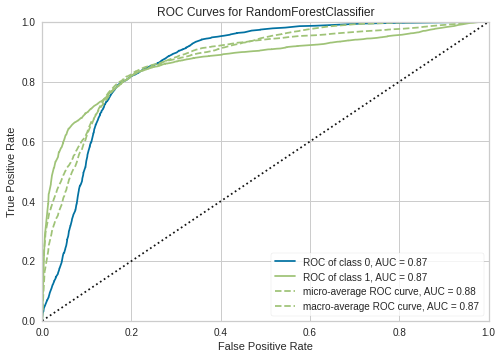

In [19]:
plot_model(rf, 'auc')

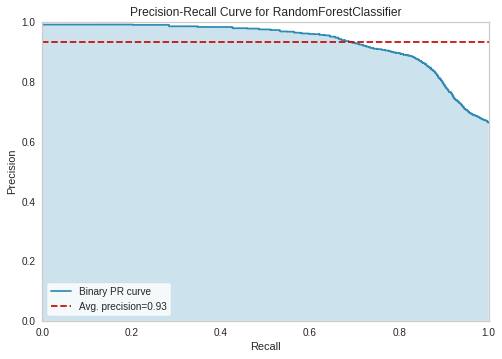

In [20]:
ax1 = plot_model(rf, 'pr')

Tant l'AUC com la precision-recall curve són mètriques que evaluen l'eficiència del model i com més areà sota la corba, millor és aquest; per tant podem dir que aquest model i com més endavant es veu, aquestes mètriques ens han donat bons resultats prop del 90% en tots els casos.

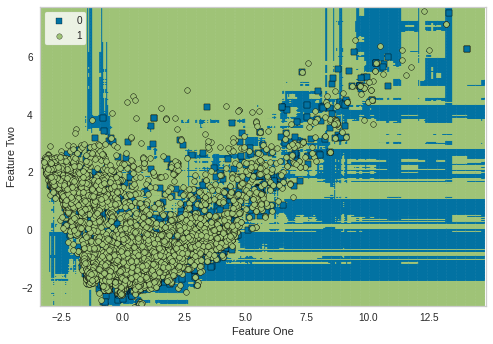

In [21]:
plot_model(rf, 'boundary')

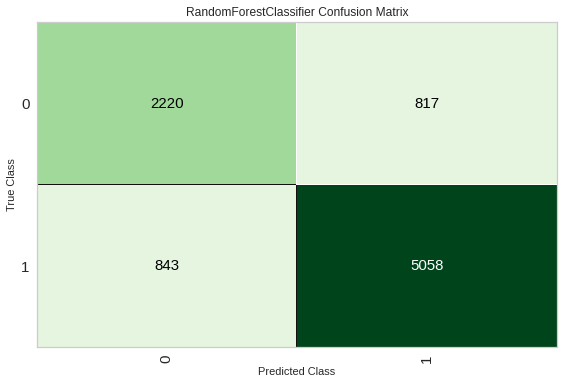

In [22]:
plot_model(rf, 'confusion_matrix')

La matriu de confusió ens mostra les mostres classificades correcte i incorrectament de les dues classes. El True Class = 0, Predicted Class = 0 diu que s'han classificat 2220 aplicacions benignes correctament; de la mateixa manera, True Class = 1, Predicted Class = 1, diu que 5058 aplicacions malignes han estat classificades bé. True Class = 0, Predicted Class = 1, és el que podriem dir com un fals positiu, si considerem que Class = 1 (maligne) és positiu, en altres paraules, 817 aplicacions han sortit com malignes quan en realitat són benignes. I finalment, la resta de les aplicacions, han produit un fals negatiu, eren malignes i s'han classificat com benignes. Tant en aquest model com en els següents es veuen resultats bons; obviament podrien millorar.

Faig una cerca aleatòria d'hiperparàmetres.
Començo creant un model Random forest.

In [23]:
rf1 = create_model("rf")
rf1

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8111,0.8788,0.8655,0.8532,0.8593,0.5722,0.5723
1,0.7987,0.8519,0.8396,0.8556,0.8475,0.5514,0.5516
2,0.7972,0.8598,0.8554,0.8427,0.8490,0.5405,0.5406
3,0.8120,0.8729,0.8589,0.8589,0.8589,0.5773,0.5773
4,0.7875,0.8503,0.8359,0.8438,0.8398,0.5245,0.5246
5,0.8206,0.8817,0.8611,0.8686,0.8648,0.5984,0.5985
6,0.7923,0.8583,0.8424,0.8455,0.8440,0.5336,0.5336
7,0.7976,0.8590,0.8518,0.8457,0.8487,0.5430,0.5430
8,0.8058,0.8701,0.8525,0.8556,0.8541,0.5637,0.5637
9,0.8086,0.8629,0.8647,0.8507,0.8577,0.5658,0.5660


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

Afino el model.

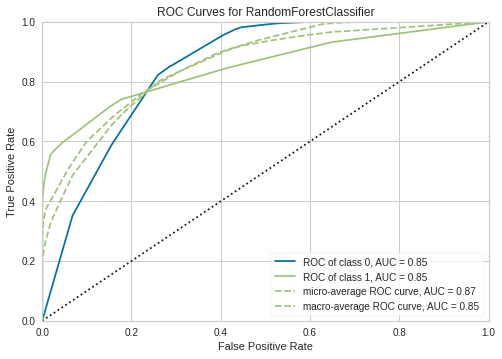

In [24]:
tuned_rf_random = tune_model(rf1)
plot_model(tuned_rf_random)

In [25]:
tuned_rf_random

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

El random search d'hiperparàmetetres s'ha realitzat entre els següents rangs de paràmetres:

In [26]:
random_grid = models(internal=True).loc["rf", "Tune Distributions"]
random_grid

{'n_estimators': IntUniformDistribution(lower=10, upper=300, log=False),
 'max_depth': IntUniformDistribution(lower=1, upper=11, log=False),
 'min_impurity_decrease': UniformDistribution(lower=1e-09, upper=0.5, log=True),
 'max_features': UniformDistribution(lower=0.4, upper=1, log=False),
 'min_samples_split': IntUniformDistribution(lower=2, upper=10, log=False),
 'min_samples_leaf': IntUniformDistribution(lower=2, upper=6, log=False),
 'bootstrap': CategoricalDistribution(values=[True, False]),
 'criterion': CategoricalDistribution(values=['gini', 'entropy']),
 'class_weight': CategoricalDistribution(values=['balanced', 'balanced_subsample', {}])}

A continuació es pot veure una comparació d'algunes mètriques pel model amb i sense l'optimització dels hiperparàmetres.

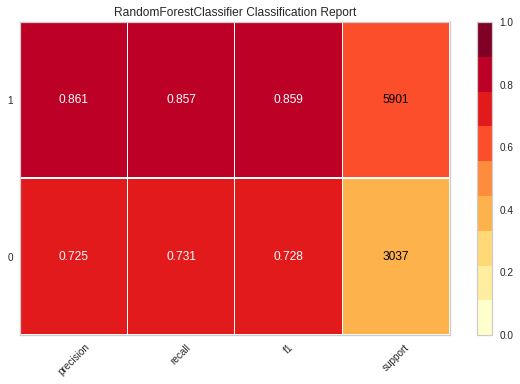

In [27]:
# class report not tuned
plot_model(rf, 'class_report')

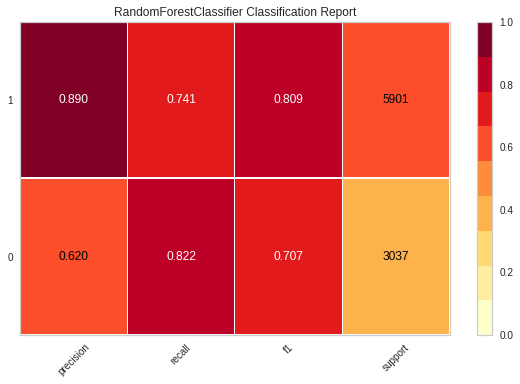

In [28]:
plot_model(tuned_rf_random, 'class_report')

#### Gradient Boosting

In [29]:
gb = top3[1]

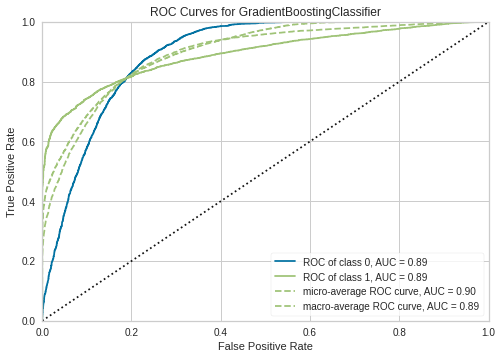

In [30]:
plot_model(gb, 'auc')

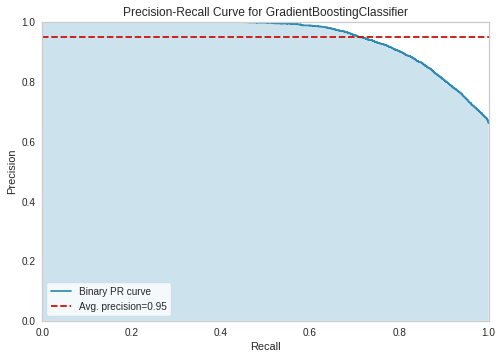

In [31]:
ax1 = plot_model(gb, 'pr')

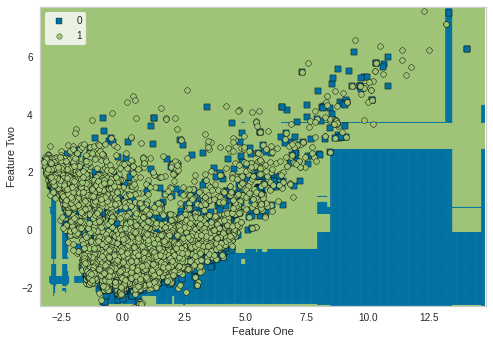

In [32]:
plot_model(gb, 'boundary')

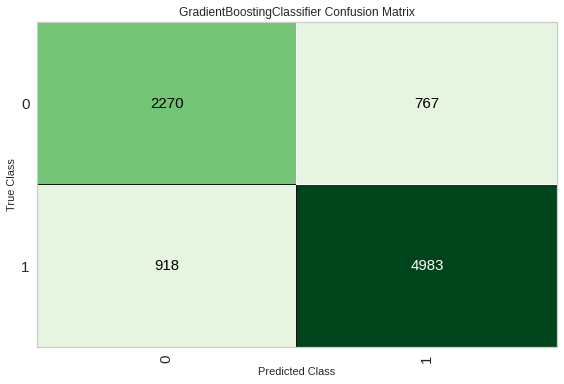

In [33]:
plot_model(gb, 'confusion_matrix')

Faig una cerca aleatòria d'hiperparàmetres.
Començo creant un model Gradient Boosting.

In [34]:
gb1 = create_model("gbc")
gb1

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8150,0.8967,0.8475,0.8713,0.8592,0.5894,0.5899
1,0.8006,0.8858,0.8295,0.8656,0.8472,0.5606,0.5617
2,0.8116,0.9002,0.8468,0.8674,0.8569,0.5813,0.5816
3,0.8106,0.8935,0.8452,0.8671,0.8560,0.5793,0.5797
4,0.7914,0.8821,0.8222,0.8586,0.8400,0.5406,0.5417
5,0.8129,0.9012,0.8452,0.8703,0.8576,0.5854,0.5859
6,0.8048,0.8910,0.8453,0.8595,0.8524,0.5644,0.5646
7,0.8038,0.8836,0.8475,0.8567,0.8521,0.5610,0.5611
8,0.8129,0.8947,0.8468,0.8693,0.8579,0.5845,0.5849
9,0.8029,0.8889,0.8309,0.8678,0.8490,0.5657,0.5668


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Afino el model.

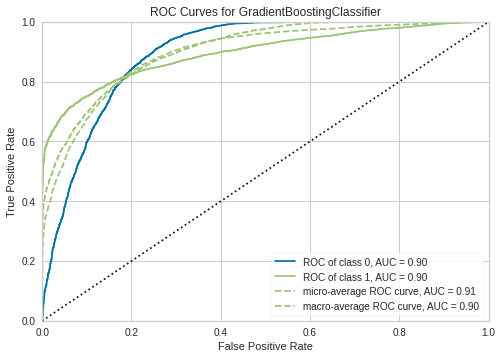

In [35]:
tuned_gb_random = tune_model(gb1)
plot_model(tuned_gb_random)

In [36]:
tuned_gb_random

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

El random search d'hiperparàmetetres s'ha realitzat entre els següents rangs de paràmetres:

In [37]:
random_grid = models(internal=True).loc["gbc", "Tune Distributions"]
random_grid

{'n_estimators': IntUniformDistribution(lower=10, upper=300, log=False),
 'learning_rate': UniformDistribution(lower=1e-06, upper=0.5, log=True),
 'subsample': UniformDistribution(lower=0.2, upper=1, log=False),
 'min_samples_split': IntUniformDistribution(lower=2, upper=10, log=False),
 'min_samples_leaf': IntUniformDistribution(lower=1, upper=5, log=False),
 'max_depth': IntUniformDistribution(lower=1, upper=11, log=False),
 'min_impurity_decrease': UniformDistribution(lower=1e-09, upper=0.5, log=True),
 'max_features': UniformDistribution(lower=0.4, upper=1, log=False)}

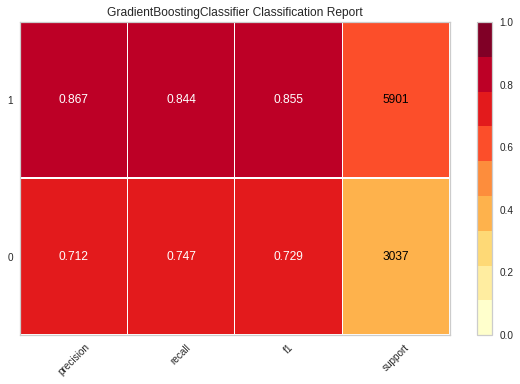

In [38]:
# class report not tuned
plot_model(gb, 'class_report')

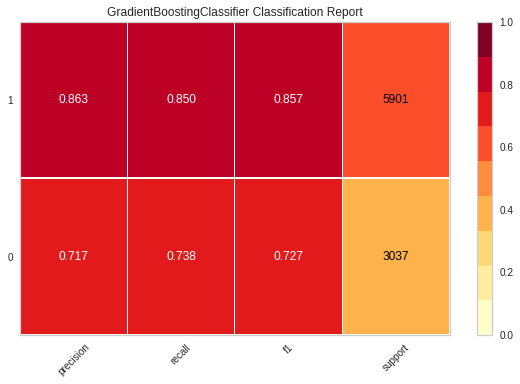

In [39]:
plot_model(tuned_gb_random, 'class_report')

#### Light Gradient Boosting Machine

In [40]:
lgb = top3[0]

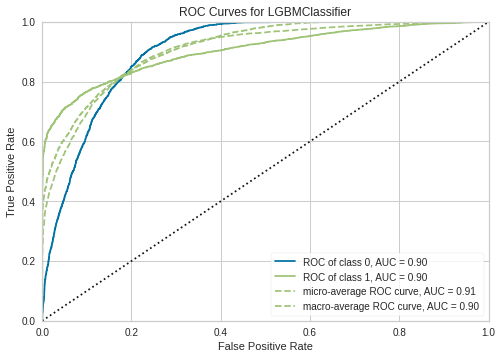

In [41]:
plot_model(lgb, 'auc')

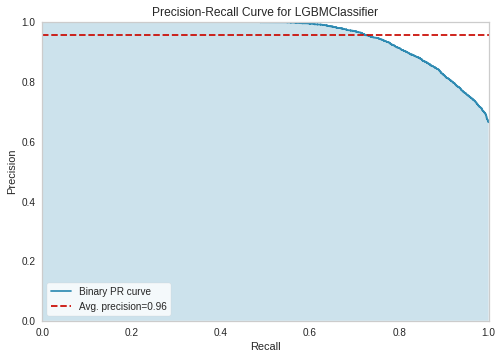

In [42]:
ax1 = plot_model(lgb, 'pr')

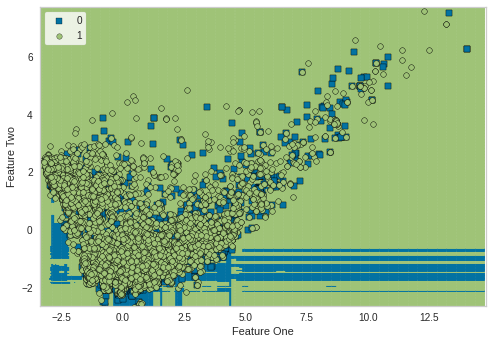

In [43]:
plot_model(lgb, 'boundary')

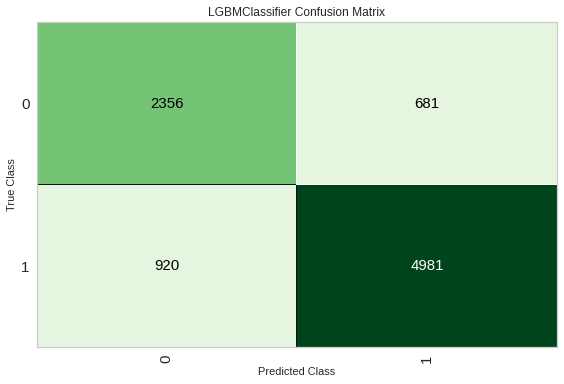

In [44]:
plot_model(lgb, 'confusion_matrix')

Faig una cerca aleatòria d'hiperparàmetres.
Començo creant un model Light Gradient Boosting Machine.

In [45]:
lgb1 = create_model("lightgbm")
lgb1

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8322,0.9071,0.8547,0.8892,0.8716,0.6298,0.6309
1,0.8188,0.9002,0.8424,0.8805,0.8610,0.6011,0.6023
2,0.8260,0.9078,0.8496,0.8846,0.8668,0.6162,0.6173
3,0.8225,0.9054,0.8438,0.8845,0.8637,0.6100,0.6113
4,0.8048,0.8926,0.8287,0.8720,0.8498,0.5717,0.5732
5,0.8249,0.9129,0.8524,0.8810,0.8664,0.6126,0.6133
6,0.8144,0.8967,0.8453,0.8723,0.8586,0.5887,0.5894
7,0.8168,0.8942,0.8489,0.8728,0.8607,0.5933,0.5938
8,0.8235,0.9066,0.8547,0.8774,0.8659,0.6080,0.6084
9,0.8125,0.9002,0.8403,0.8736,0.8566,0.5860,0.5869


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Afino el model.

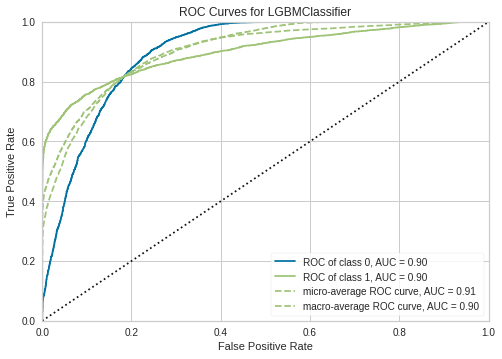

In [46]:
tuned_lgb_random = tune_model(lgb1)
plot_model(tuned_lgb_random)

In [47]:
tuned_lgb_random

LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

El random search d'hiperparàmetetres s'ha realitzat entre els següents rangs de paràmetres:

In [48]:
random_grid = models(internal=True).loc["lightgbm", "Tune Distributions"]
random_grid

{'num_leaves': IntUniformDistribution(lower=2, upper=256, log=False),
 'learning_rate': UniformDistribution(lower=1e-06, upper=0.5, log=True),
 'n_estimators': IntUniformDistribution(lower=10, upper=300, log=False),
 'min_split_gain': UniformDistribution(lower=0, upper=1, log=False),
 'reg_alpha': UniformDistribution(lower=1e-10, upper=10, log=True),
 'reg_lambda': UniformDistribution(lower=1e-10, upper=10, log=True),
 'feature_fraction': UniformDistribution(lower=0.4, upper=1, log=False),
 'bagging_fraction': UniformDistribution(lower=0.4, upper=1, log=False),
 'bagging_freq': IntUniformDistribution(lower=0, upper=7, log=False),
 'min_child_samples': IntUniformDistribution(lower=1, upper=100, log=False)}

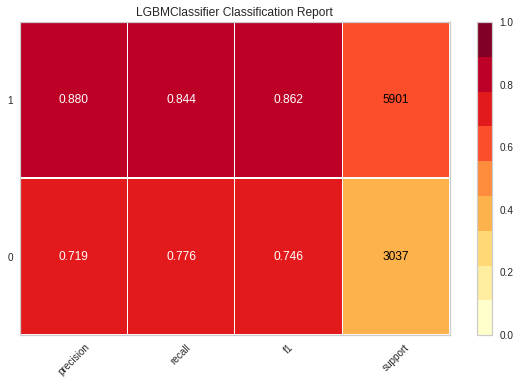

In [49]:
# class report not tuned
plot_model(lgb, 'class_report')

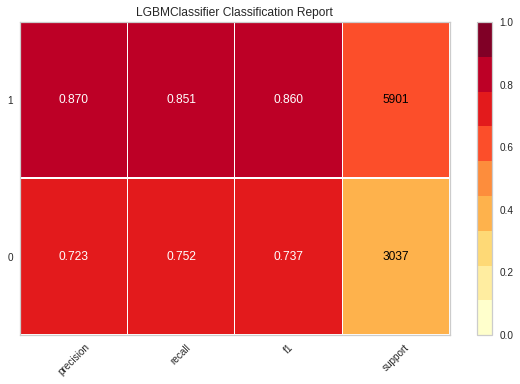

In [50]:
plot_model(tuned_lgb_random, 'class_report')

### **Sklearn**

Provo per aquests mateixos models amb altres llibreries.

Separo l'atribut objectiu i el model en entrenament i test.

In [51]:
X = df.drop('Class', axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

Per normalitzar

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

#### Random Forest

In [53]:
rf = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [54]:
y_pred_rf = rf.predict(X_test)


In [55]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


In [56]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71      1973
           1       0.90      0.75      0.82      3986

    accuracy                           0.77      5959
   macro avg       0.76      0.79      0.76      5959
weighted avg       0.81      0.77      0.78      5959



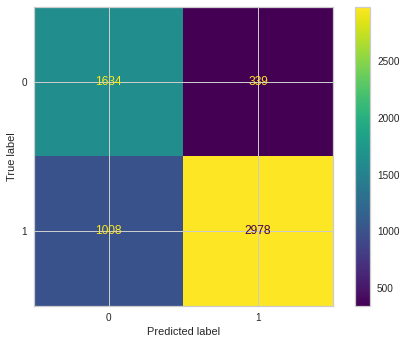

In [57]:
plot_confusion_matrix(rf, X_test, y_test)

#### Gradient Boosting

In [58]:
gb = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
y_pred_gb = gb.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1973
           1       0.87      0.85      0.86      3986

    accuracy                           0.81      5959
   macro avg       0.79      0.79      0.79      5959
weighted avg       0.81      0.81      0.81      5959



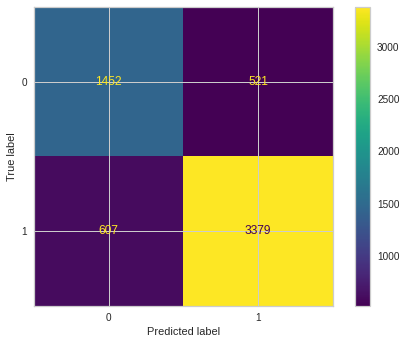

In [61]:
plot_confusion_matrix(gb, X_test, y_test)

In [62]:
X_new = df.drop('Class', axis = 1)
y_new = df['Class']
X_new.columns = [i for i in range(len(X_new.columns))]

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 101)

#### Light Gradient Boosting Machine

In [63]:
lgbm = lgb.LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [64]:
y_pred_lgbm = lgbm.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73      1973
           1       0.87      0.84      0.86      3986

    accuracy                           0.81      5959
   macro avg       0.79      0.80      0.79      5959
weighted avg       0.82      0.81      0.81      5959



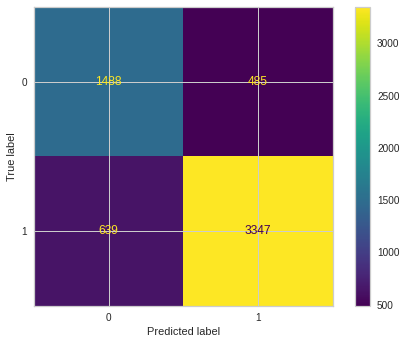

In [66]:
plot_confusion_matrix(lgbm, X_test, y_test)

Es pot observar que els resultats són bastant semblants als que hem aconseguit amb la llibreria Pycaret, tenen el mateix ordre de eficiènica tot i que els 3 estan unes centècimes per sota dels resultats obtinguts inicialment.